In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy as spy
import scipy.optimize as op
import random
import matplotlib.cm as cm #Used to display images in a specific colormap

In [2]:
input_layer_size  = 400;  
num_labels = 10;          
# Load Training Data
path="H:/assignments/machine_learning/mex3/ex3/ex3data1.mat"
data=sio.loadmat(path)
X=data['X']
y=data['y']


In [3]:
def display_data(X,indices_to_display = None):
    """
    Function that picks 100 random rows from X, creates a 20x20 image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    width, height = 20, 20
    nrows, ncols = 10, 10
    if not indices_to_display:
        indices_to_display = random.sample(range(X.shape[0]), nrows*ncols)
        
    big_picture = np.zeros((height*nrows,width*ncols))
    
    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = X[idx].reshape(width,height).T
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(6,6))
    img = spy.misc.toimage( big_picture )
    plt.imshow(img,cmap = cm.Greys_r)
    plt.show()

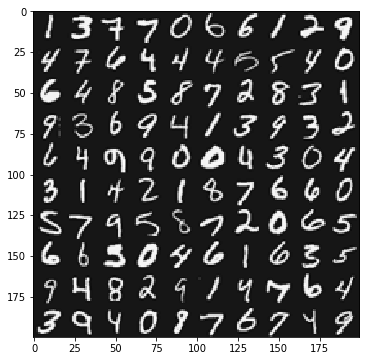

In [4]:
display_data(X)

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
plt.close('all')
def cost_logi_reg(theta,X,y,lam):
#     print('1',theta.shape)
    theta = np.reshape(theta,(len(theta),1))
#     print('1',theta.shape)
    a=-np.dot(y.T,np.log(sigmoid(X.dot(theta))))
    b=-np.dot((1-y).T,np.log(1-sigmoid(X.dot(theta))))
    j=np.sum(a+b)/X.shape[0] + lam*np.sum(np.square(theta[1:]))/(2*X.shape[0])
    return j
def grad_logi_reg(theta,X,y,lam):
#     print('2',theta.shape)
    theta = np.reshape(theta,(len(theta),1))
#     print('2',theta.shape)
    grad=np.dot((sigmoid(X.dot(theta))-y).T,X).T/X.shape[0]+ (lam/X.shape[0])*np.r_[[[0]],theta[1:]]
#     print('2',grad.shape)
    return grad.flatten()

In [7]:
def one_vs_all(X, y, num_labels, lam):
    m = X.shape[0]
    n = X.shape[1]
    initial_theta = np.zeros((n))
    all_theta = []
    for i in num_labels:
         Result = op.minimize(fun = cost_logi_reg,  x0 = initial_theta, args = (X, (y==i).astype(int),lam),method = 'TNC',jac = grad_logi_reg)
         opt_theta=Result.x
         all_theta.append(opt_theta)
    return all_theta
 

In [8]:
theta_t =  np.array([[-2,-1,1,2]]).T;
arr=np.reshape((np.c_[1:16]/10),(3,5)).T
X_t = np.c_[np.ones((5, 1)),arr];
y_t = np.c_[1,0,1,0,1].T
lambda_t = 3
J= cost_logi_reg(theta_t, X_t, y_t, lambda_t)
grad=grad_logi_reg(theta_t, X_t, y_t, lambda_t)
J,grad

(2.5348193961097443,
 array([ 0.14656137, -0.54855841,  0.72472227,  1.39800296]))

In [9]:
lamb = 0.1;
num_labels= list(range(1, 11))
X=np.c_[np.ones((data['X'].shape[0],1)), data['X']]
all_theta= one_vs_all(X, y, num_labels, lamb);

In [10]:
np.c_[all_theta].shape

(10, 401)

In [12]:
def predict_one_vs_all(all_theta, X):
    probs=sigmoid(np.dot(X,all_theta.T))
    return (np.argmax(probs, axis=1)+1)



In [13]:
pred=predict_one_vs_all(np.c_[all_theta],X)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

Training set accuracy: 96.46000000000001 %


## Neural Network Implementation

In [14]:
input_layer_size  = 400
hidden_layer_size = 25   
num_labels = 10   

In [15]:
path="H:/assignments/machine_learning/mex3/ex3/ex3data1.mat"
data=sio.loadmat(path)
X=data['X']
y=data['y']

In [19]:
path='H:/assignments/machine_learning/mex3/ex3/ex3weights.mat'
wgt=sio.loadmat(path)
theta1=wgt['Theta1']
theta2=wgt['Theta2']

In [28]:
def predict_nn(theta1,theta2,X):
    layer1_act=sigmoid(np.dot(X,theta1.T))
    layer1_act=np.c_[np.ones((layer1_act.shape[0],1)),layer1_act]
    layer2_act=sigmoid(np.dot(layer1_act,theta2.T))
    return (np.argmax(layer2_act, axis=1)+1)

In [29]:
XX=np.c_[np.ones((X.shape[0],1)),X]
pred=predict_nn(theta1,theta2,XX)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

Training set accuracy: 97.52 %


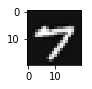


Neural Network Prediction: 7


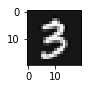


Neural Network Prediction: 3


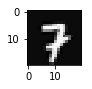


Neural Network Prediction: 7


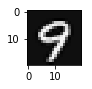


Neural Network Prediction: 9


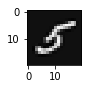


Neural Network Prediction: 5


In [56]:
indices_to_display = random.sample(range(X.shape[0]), 5)
for idx in indices_to_display:
        inp=np.c_[X[idx]].T
        iimg = X[idx].reshape(20,20).T
        fig = plt.figure(figsize=(2,1))
        img = spy.misc.toimage(iimg)
        plt.imshow(img,cmap = cm.Greys_r)
        plt.show()
        inp=np.c_[np.ones((inp.shape[0],1)),inp]
        print('\nNeural Network Prediction:',np.sum(predict_nn(theta1,theta2,inp)))
plt.close('all')             